In [ ]:
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
stock_tickers = ["^NSEI", "^GSPC"]
stock_names = ["NIFTY_50", "S&P500"]
stock_data = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2024-01-06', end = '2024-06-06')
    stock_data[stock_names[ticker]] = hist['Close']

prices_df = pd.DataFrame(stock_data)
prices_df = prices_df.resample('D').last()
prices_df.fillna(method='ffill', inplace=True)
returns_df = prices_df.pct_change().dropna()


### **I plotted the correlation at different lags (so 1-day lag, 2-day lag, etc)**

Correlation: 0.012983015393294436


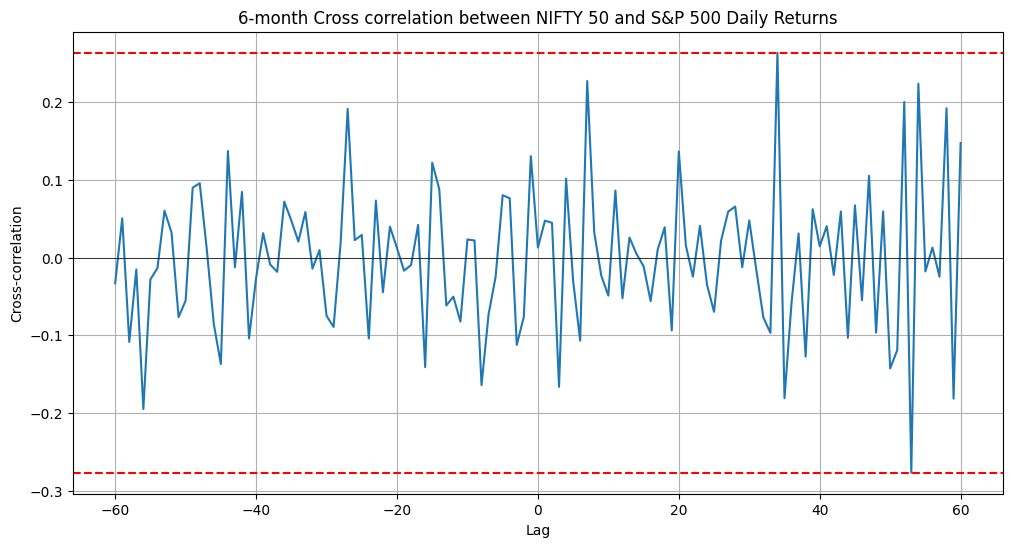

Number of days with positive correlation: 67
Number of days with negative correlation: 82


In [ ]:

correlation = returns_df['NIFTY_50'].corr(returns_df['S&P500'])
print(f'Correlation: {correlation}')

lags = range(-60, 61)
cross_corr = [returns_df['NIFTY_50'].corr(returns_df['S&P500'].shift(lag)) for lag in lags]


plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('6-month Cross correlation between NIFTY 50 and S&P 500 Daily Returns')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(max(cross_corr), color='red', linestyle='--')
plt.axhline(min(cross_corr), color='red', linestyle='--')
plt.grid(True)
plt.show()
returns_df['NIFTY_50_Sign'] = np.sign(returns_df['NIFTY_50'])
returns_df['S&P500_Sign'] = np.sign(returns_df['S&P500'])

same_sign_days = (returns_df['NIFTY_50_Sign'] == returns_df['S&P500_Sign']).sum()
opposite_sign_days = (returns_df['NIFTY_50_Sign'] != returns_df['S&P500_Sign']).sum()

print(f'Number of days with positive correlation: {same_sign_days}')
print(f'Number of days with negative correlation: {opposite_sign_days}')

Correlation: 0.17725349134522808


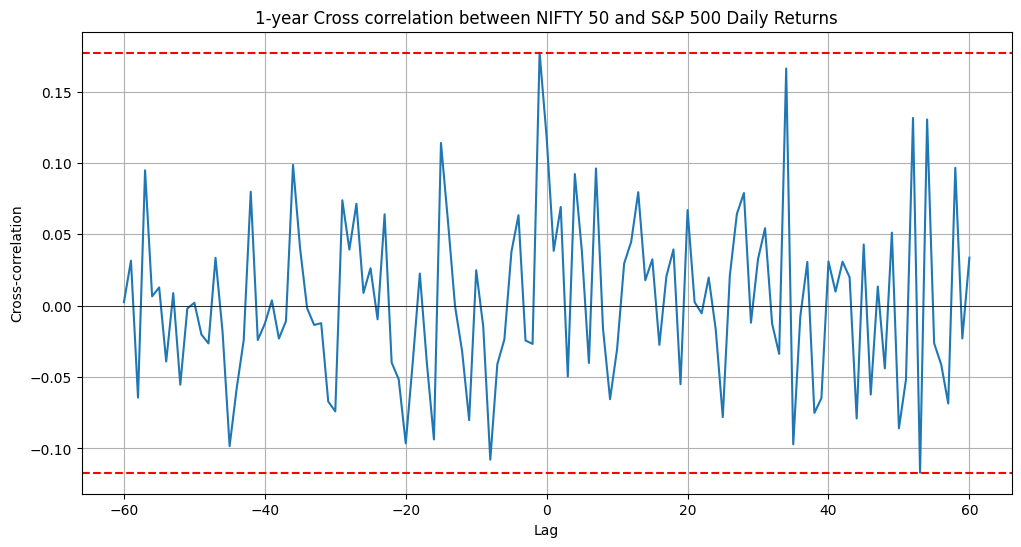

Number of days with positive correlation: 165
Number of days with negative correlation: 200


In [ ]:
stock_tickers = ["^NSEI", "^GSPC"]
stock_names = ["NIFTY_50", "S&P500"]
stock_data = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2023-06-06', end = '2024-06-06')
    stock_data[stock_names[ticker]] = hist['Close']

prices_df = pd.DataFrame(stock_data)
prices_df = prices_df.resample('D').last()
prices_df.fillna(method='ffill', inplace=True)
returns_df = prices_df.pct_change().dropna()
correlation = returns_df['NIFTY_50'].corr(returns_df['S&P500'].shift(-1))
print(f'Correlation: {correlation}')

lags = range(-60, 61)
cross_corr = [returns_df['NIFTY_50'].corr(returns_df['S&P500'].shift(lag)) for lag in lags]


plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('1-year Cross correlation between NIFTY 50 and S&P 500 Daily Returns')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(max(cross_corr), color='red', linestyle='--')
plt.axhline(min(cross_corr), color='red', linestyle='--')
plt.grid(True)
plt.show()
returns_df['NIFTY_50_Sign'] = np.sign(returns_df['NIFTY_50'])
returns_df['S&P500_Sign'] = np.sign(returns_df['S&P500'])

same_sign_days = (returns_df['NIFTY_50_Sign'] == returns_df['S&P500_Sign']).sum()
opposite_sign_days = (returns_df['NIFTY_50_Sign'] != returns_df['S&P500_Sign']).sum()


print(f'Number of days with positive correlation: {same_sign_days}')
print(f'Number of days with negative correlation: {opposite_sign_days}')

Correlation: 0.2171894405973893
                           NIFTY_50    S&P500  NIFTY_50_Close  S&P500_Close  \
S&P500 Date                                                                   
2021-06-08 00:00:00+00:00  0.006549  0.000175    15737.750000   4227.259766   
2021-06-09 00:00:00+00:00  0.003914 -0.001824    15799.349609   4219.549805   
2021-06-10 00:00:00+00:00  0.000000  0.004652    15799.349609   4239.180176   
2021-06-11 00:00:00+00:00  0.000000  0.001948    15799.349609   4247.439941   
2021-06-12 00:00:00+00:00  0.000791  0.000000    15811.849609   4247.439941   
...                             ...       ...             ...           ...   
2024-06-01 00:00:00+00:00  0.032542  0.000000    23263.900391   5277.509766   
2024-06-02 00:00:00+00:00 -0.059294  0.000000    21884.500000   5277.509766   
2024-06-03 00:00:00+00:00  0.033624  0.001116    22620.349609   5283.399902   
2024-06-04 00:00:00+00:00  0.000000  0.001503    22620.349609   5291.339844   
2024-06-05 00:00:00+

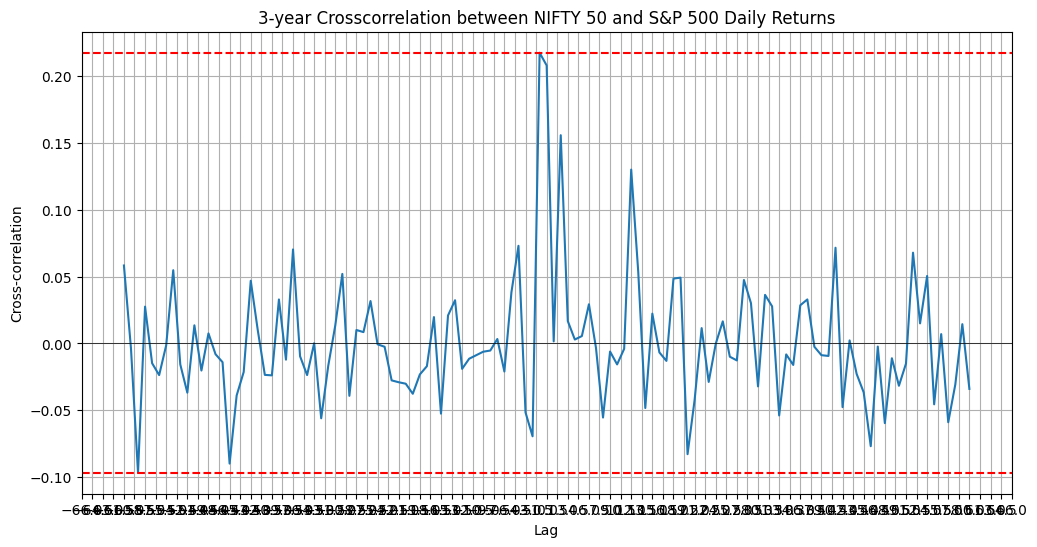

Number of days with positive correlation: 492
Number of days with negative correlation: 602


In [ ]:
from matplotlib.ticker import MaxNLocator
stock_tickers = ["^NSEI", "^GSPC"]
stock_names = ["NIFTY_50", "S&P500"]
stock_data = {}
for ticker in range(len(stock_tickers)):
    stock = yf.Ticker(stock_tickers[ticker])
    hist = stock.history(start = '2021-06-06', end = '2024-06-06')
    stock_data[stock_names[ticker]] = hist['Close']

prices_df = pd.DataFrame(stock_data)
prices_df = prices_df.resample('D').last()
prices_df.fillna(method='ffill', inplace=True)
returns_df = prices_df.pct_change().dropna()
correlation = returns_df['NIFTY_50'].corr(returns_df['S&P500'].shift(-1))
print(f'Correlation: {correlation}')

returns = pd.DataFrame()
returns['NIFTY_50'] = returns_df['NIFTY_50'].shift(-1)
returns['S&P500'] = returns_df['S&P500']
returns['NIFTY_50_Close'] = prices_df['NIFTY_50'].shift(-1)
returns['S&P500_Close'] = prices_df['S&P500']
returns['Correlation'] = returns['NIFTY_50'].rolling(window=30).corr(returns['S&P500'])
returns.index = returns_df.index
returns = returns.rename_axis("S&P500 Date")
returns.to_csv('returns.csv')
print(returns)

lags = range(-60, 61)
cross_corr = [returns_df['NIFTY_50'].corr(returns_df['S&P500'].shift(lag)) for lag in lags]


plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('3-year Crosscorrelation between NIFTY 50 and S&P 500 Daily Returns')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(max(cross_corr), color='red', linestyle='--')
plt.axhline(min(cross_corr), color='red', linestyle='--')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=120))
plt.grid(True)
plt.show()
returns_df['NIFTY_50_Sign'] = np.sign(returns_df['NIFTY_50'])
returns_df['S&P500_Sign'] = np.sign(returns_df['S&P500'])


same_sign_days = (returns_df['NIFTY_50_Sign'] == returns_df['S&P500_Sign']).sum()
opposite_sign_days = (returns_df['NIFTY_50_Sign'] != returns_df['S&P500_Sign']).sum()

print(f'Number of days with positive correlation: {same_sign_days}')
print(f'Number of days with negative correlation: {opposite_sign_days}')

In [ ]:

fed_funds_rate = pd.read_csv("FEDFUNDS.csv")

fed_funds_rate['DATE'] = pd.to_datetime(fed_funds_rate['DATE'])
fed_funds_rate.set_index('DATE', inplace=True)

date_range = pd.date_range(start='2019-12-01', end='2024-05-31', freq='M')
rbi_repo_rate = pd.DataFrame(index=date_range)


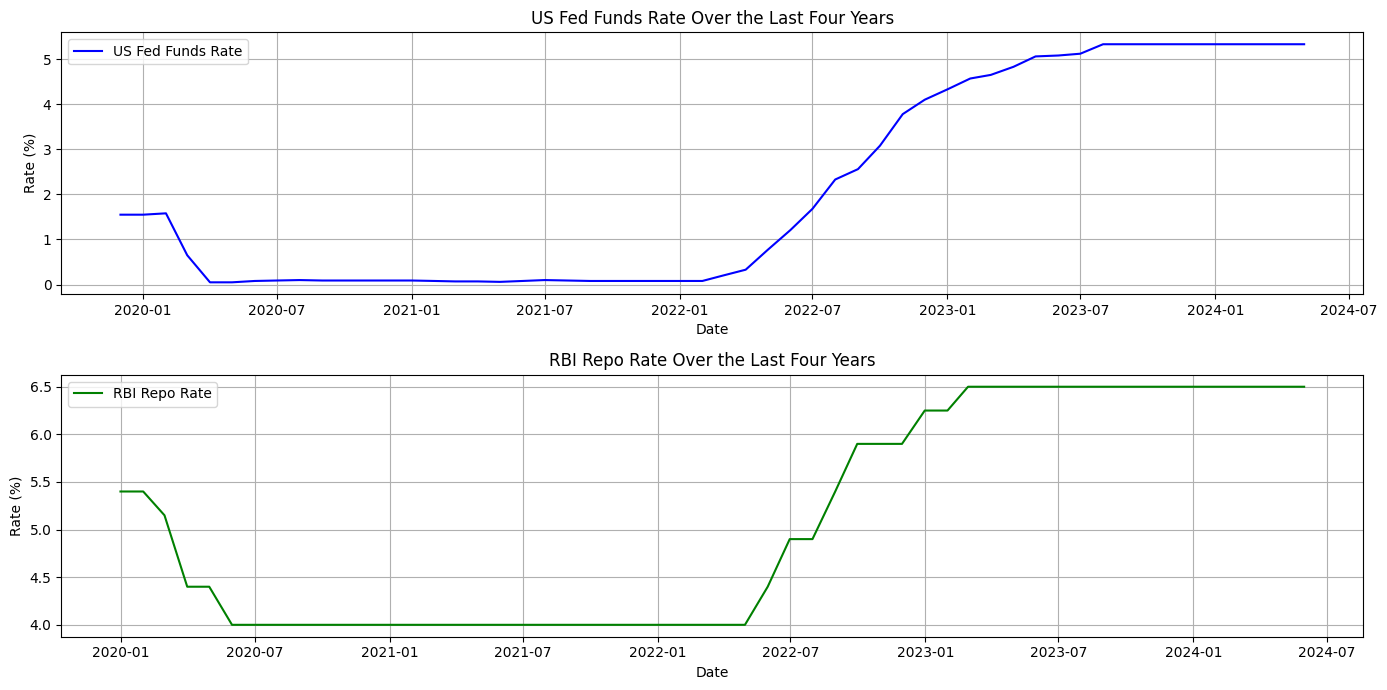

Correlation between the Fed Funds Rate and the RBI Repo Rate: 0.9839326897226502


In [ ]:
rbi_repo_rate = {
    "date": ["2019-12-31", "2020-02-06", "2020-03-27", "2020-05-22", "2020-08-06", "2020-10-09", "2022-05-04", "2022-06-08", "2022-08-05", "2022-09-30", "2022-12-07", "2023-02-08", "2023-06-08"],
    "Repo Rate": [5.40, 5.15, 4.40, 4.00, 4.00, 4.00, 4.40, 4.90, 5.40, 5.90, 6.25, 6.50, 6.50]
}
rbi_repo_rate = pd.DataFrame(rbi_repo_rate)
rbi_repo_rate['date'] = pd.to_datetime(rbi_repo_rate['date'])
rbi_repo_rate.set_index('date', inplace=True)


date_range = pd.date_range(start='2019-12-01', end='2024-05-31', freq='D')
full_rbi_repo_rate = pd.DataFrame(index=date_range)

full_rbi_repo_rate = full_rbi_repo_rate.merge(rbi_repo_rate, how='left', left_index=True, right_index=True)
full_rbi_repo_rate['Repo Rate'].fillna(method='ffill', inplace=True)
full_rbi_repo_rate = full_rbi_repo_rate.resample('M').last()
#print(full_rbi_repo_rate)
plt.figure(figsize=(14, 7))


plt.subplot(2, 1, 1)
plt.plot(fed_funds_rate.index, fed_funds_rate['FEDFUNDS'], label='US Fed Funds Rate', color='blue')
plt.title('US Fed Funds Rate Over the Last Four Years')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(full_rbi_repo_rate.index, full_rbi_repo_rate['Repo Rate'], label='RBI Repo Rate', color='green')
plt.title('RBI Repo Rate Over the Last Four Years')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

full_rbi_repo_rate.index = full_rbi_repo_rate.index.to_period('M').to_timestamp('M')
fed_funds_rate.index = fed_funds_rate.index.to_period('M').to_timestamp('M')

merged_data = pd.merge(full_rbi_repo_rate, fed_funds_rate, left_index=True, right_index=True, how='right')
#print(merged_data)
correlation = merged_data['Repo Rate'].corr(merged_data['FEDFUNDS'])
print(f'Correlation between the Fed Funds Rate and the RBI Repo Rate: {correlation}')

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

stock_tickers = ["^NSEI", "^GSPC"]
stock_names = ["NIFTY_50", "S&P500"]


stock_data = {}
for ticker, name in zip(stock_tickers, stock_names):
    stock = yf.Ticker(ticker)
    hist = stock.history(start='2021-06-06', end='2024-06-06')
    stock_data[name] = hist['Close']

# Create a DataFrame with the fetched data
prices_df = pd.DataFrame(stock_data)

# Resample the data to daily frequency, taking the last available value each day
prices_df = prices_df.resample('D').last()

# Forward fill missing values to handle NaNs resulting from non-matching dates
prices_df.fillna(method='ffill', inplace=True)

# Calculate daily returns
returns_df = prices_df.pct_change().dropna()

# Add date, prices, and percentage changes to a new DataFrame
final_df = pd.DataFrame({
    'Date': returns_df.index,
    'S&P500_Price': prices_df['S&P500'],
    'NIFTY_50_Price': prices_df['NIFTY_50'],
    'S&P500_Return': returns_df['S&P500'],
    'NIFTY_50_Return': returns_df['NIFTY_50']
})

# Calculate correlation between S&P 500 and Nifty returns
final_df['Correlation'] = returns_df['NIFTY_50'].rolling(window=2).corr(returns_df['S&P500'])

# Save the final DataFrame to a CSV file
final_df.to_csv('returns_with_basic_data.csv', index=False)

# Print the final DataFrame to verify
print(final_df.head())
